In [97]:
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units
import thomsonpy.data_management.formatter as formatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import thomsonpy.config.paths as paths
from octree import Octree, Data

In [98]:
"""
Starts execution of solar corona modeling with the Predictive Science model.
"""
print("Imaging between", sip.IMAGE_MIN * units.METERS_TO_RSOL, "RSol and" , sip.IMAGE_MAX * units.METERS_TO_RSOL, "RSol.")
print("Resolution = ", sip.IMAGE_RESOLUTION / 1000, " km (", sip.IMAGE_NUM_POINTS, "x", sip.IMAGE_NUM_POINTS, ").")
x_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS) # de - a +
#print(x_values)
y_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS)[::-1] # de + a -
#print(y_values)
model = np.zeros((sip.IMAGE_NUM_POINTS, sip.IMAGE_NUM_POINTS))
print("# Numeric integral steps =", tsp.NUM_Z)

def create_image():
    # Quadrant 1
    print("Loading octree...")
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_1.oct")
    print("Octree loaded.")

    num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS / 4
    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")


    # Quadrant 2
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_2.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 3
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_3.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0 

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 4
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_4.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    formatter.dump("thomsonscattering.np", model)
    model = formatter.load("thomsonscattering.np")


Imaging between [-1.35931973 -1.35931973] RSol and [1.35931973 1.35931973] RSol.
Resolution =  10000.0  km ( 189 x 189 ).
# Numeric integral steps = 80.0


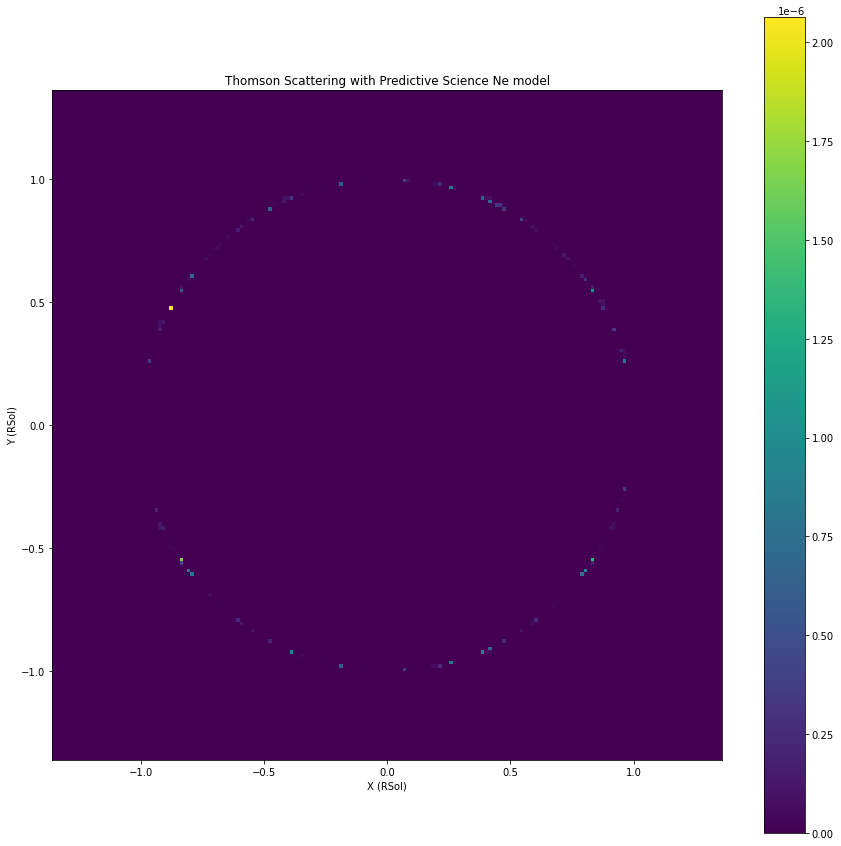

In [99]:
model = formatter.load("thomsonscattering.np")
"""
Visualization of the ThomsonScattering.
"""

plt.figure(figsize=(15, 15))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model, extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

In [100]:
for i in test:
    print(i)

[5.42707696e-12 5.43125466e-12 5.42186836e-12 5.41608744e-12
 5.39497583e-12 5.39149966e-12 5.37967705e-12 5.36493635e-12
 5.34915483e-12 5.32287207e-12 5.30764318e-12 5.27551515e-12
 5.24817289e-12 4.35013229e-12 4.32327582e-12 4.30135140e-12
 4.27424053e-12 4.24610775e-12 4.21791673e-12 4.18491307e-12
 4.15253559e-12 4.11815154e-12 4.08807394e-12 4.04374173e-12
 4.00586824e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

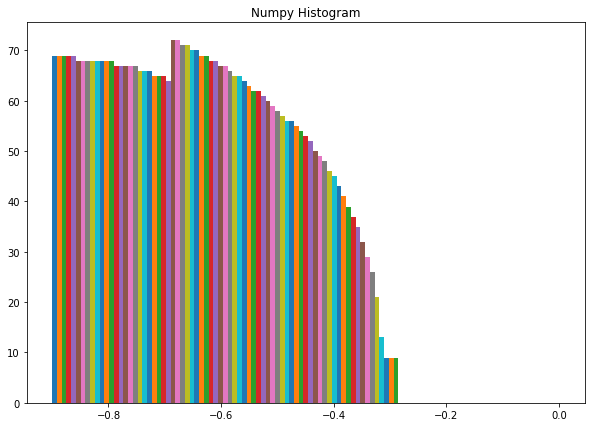

In [101]:
test = model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]

# Creating plot
fig = plt.figure(figsize =(10, 7))
 
plt.hist(test, bins = [-1, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3])
 
plt.title("Numpy Histogram")
 
# show plot
plt.show()

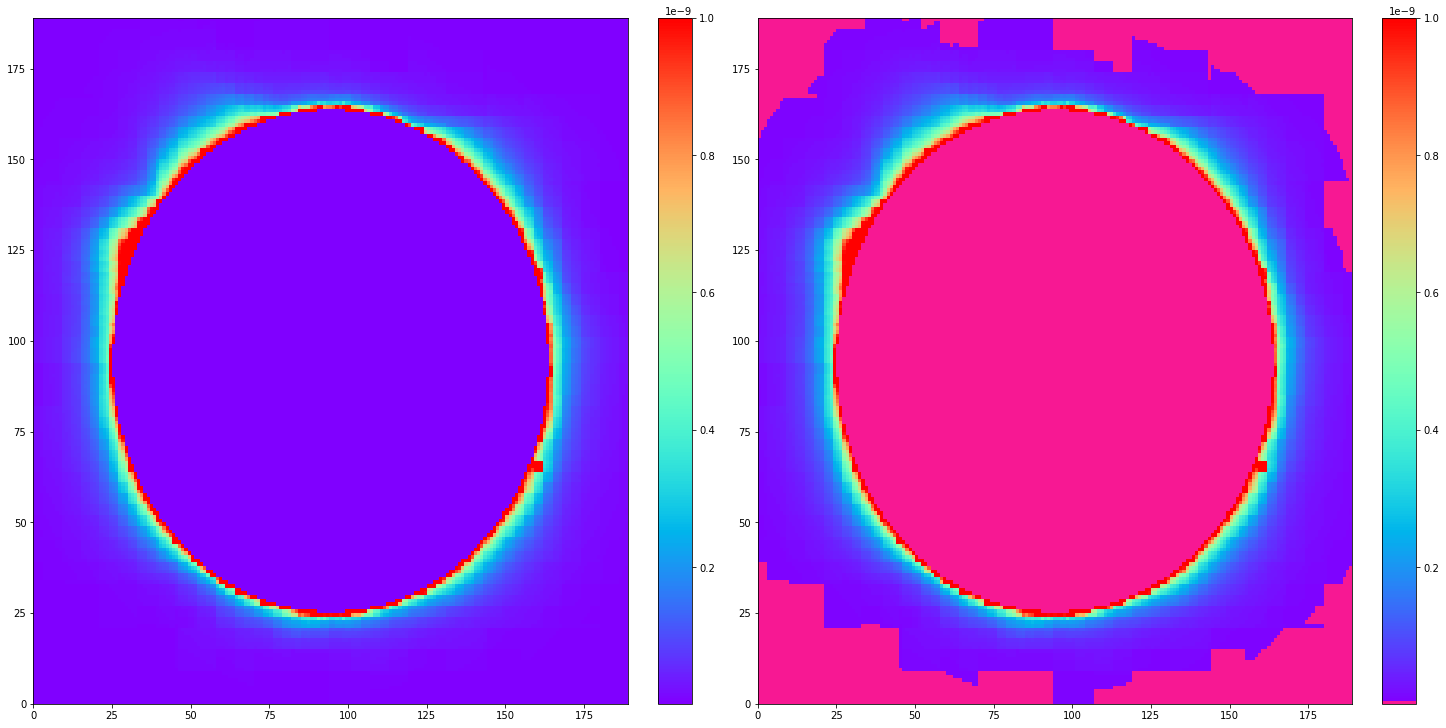

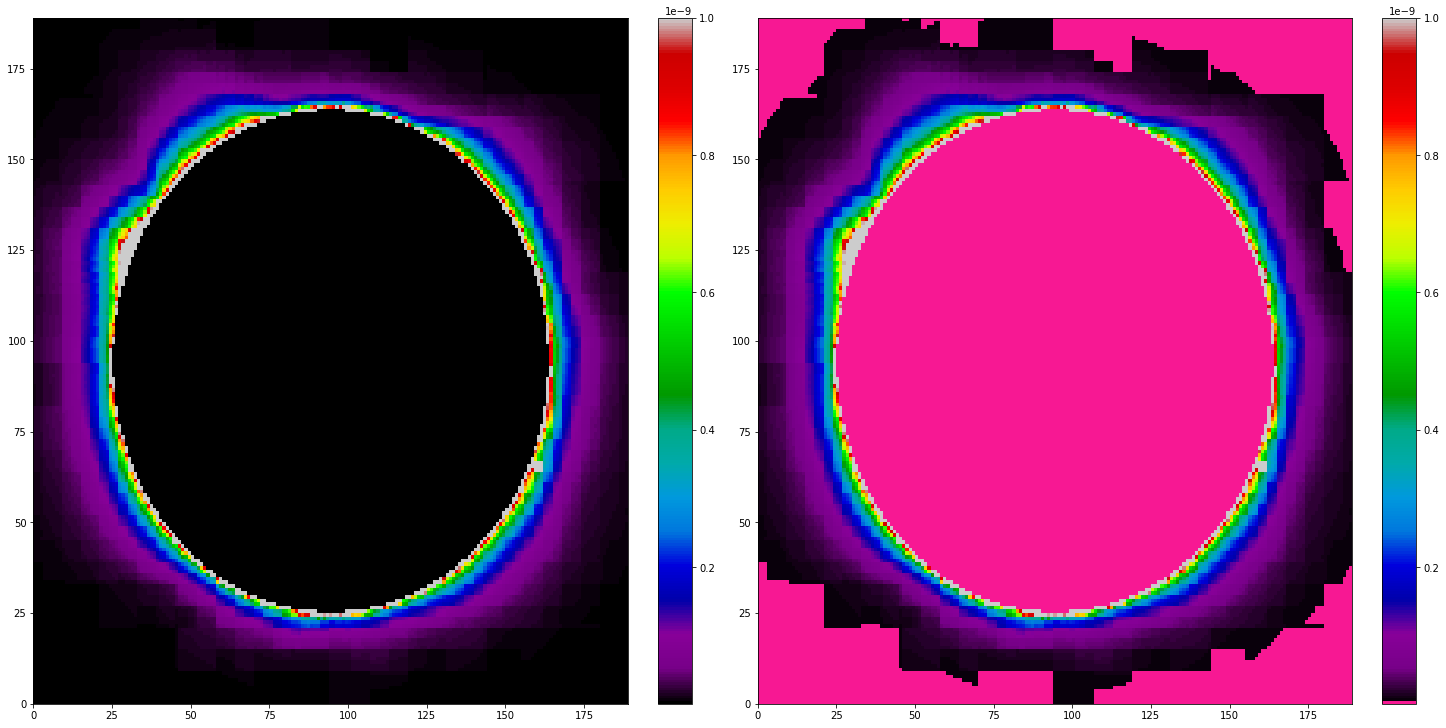

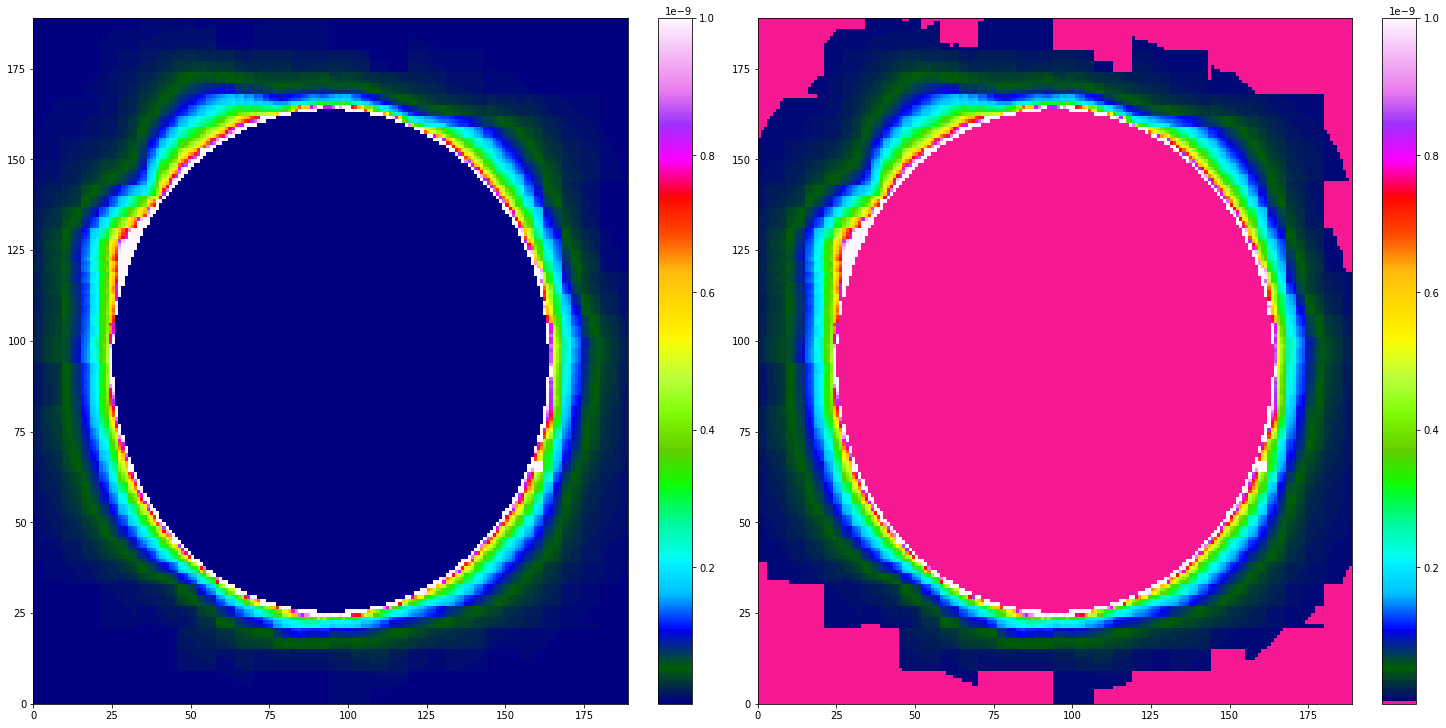

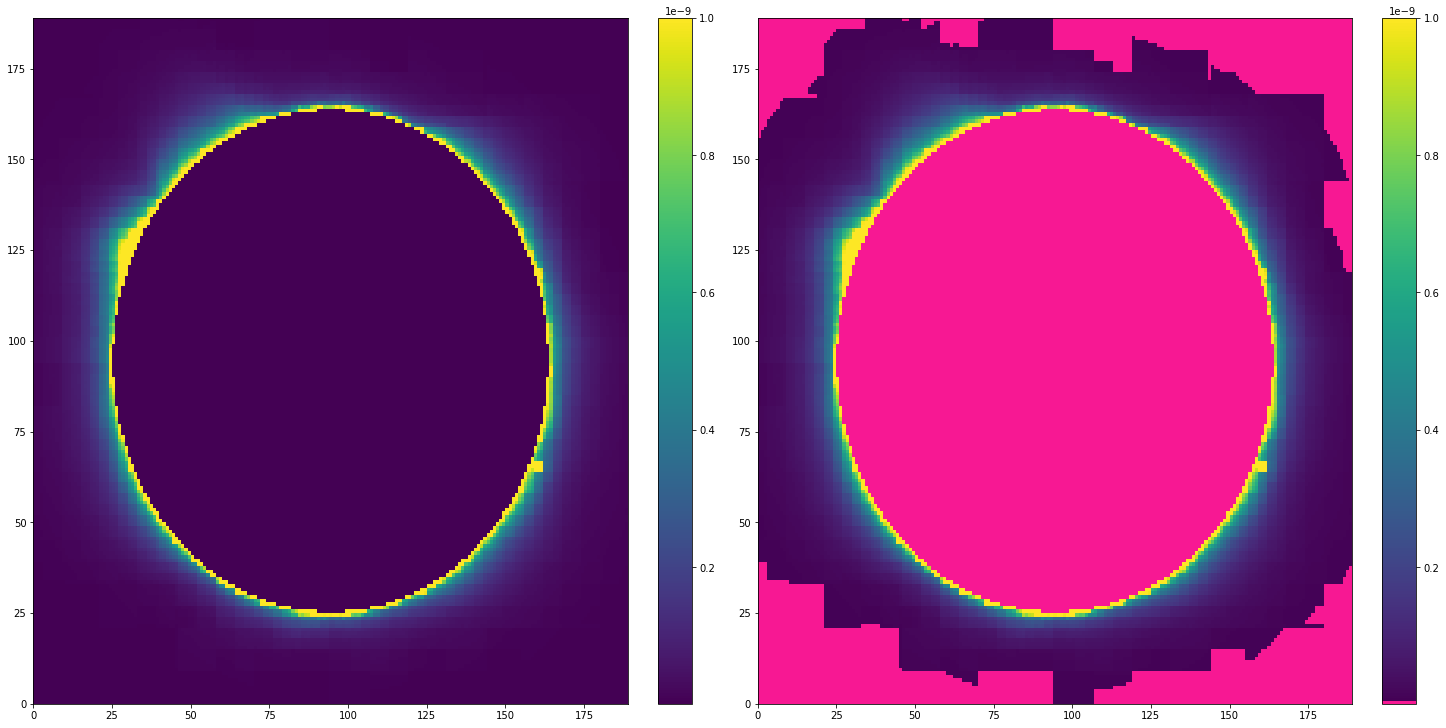

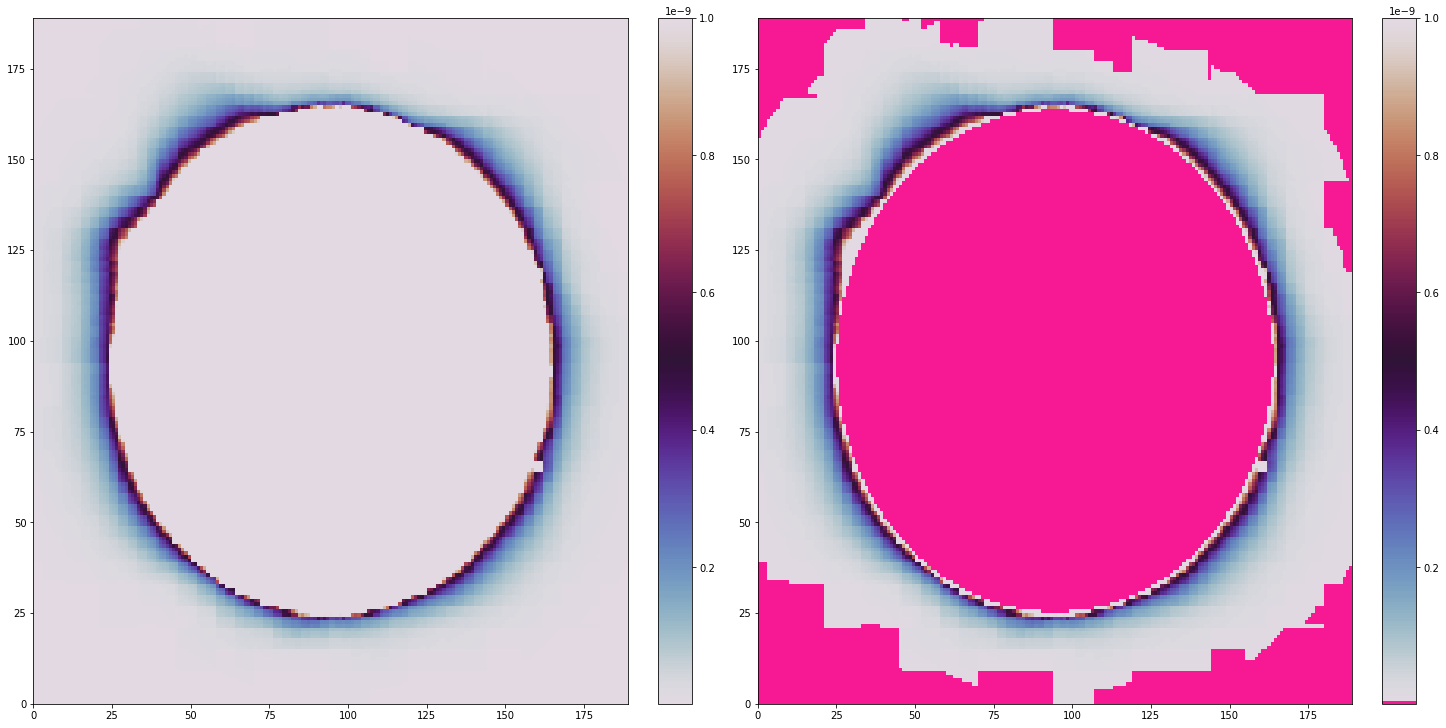

In [102]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    data = model

    fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=1e-12, vmax=1e-9)
        fig.colorbar(psm, ax=ax)
    plt.show()
colormaps = ['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight']
for i in colormaps:
    
    viridis = plt.get_cmap(i, 256)
    newcolors = viridis(np.linspace(0, 1, 256))
    pink = np.array([248/256, 24/256, 148/256, 1])
    newcolors[:1, :] = pink
    newcmp = ListedColormap(newcolors)

    plot_examples([viridis, newcmp])

/tmp/ipykernel_10170/941853944.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
/tmp/ipykernel_10170/941853944.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
/tmp/ipykernel_10170/941853944.py:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
/tmp/ipykernel_10170/941853944.py:42: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model[0:(sip.IMAGE_NUM_POINTS // 2), 0:(sip.IMAGE_NUM_POINTS // 2)]), extent=[0, sip.MAX_

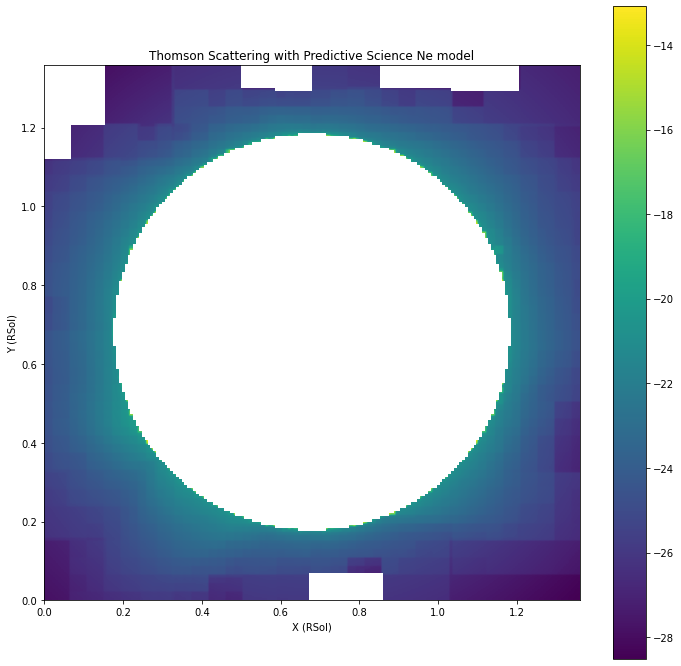

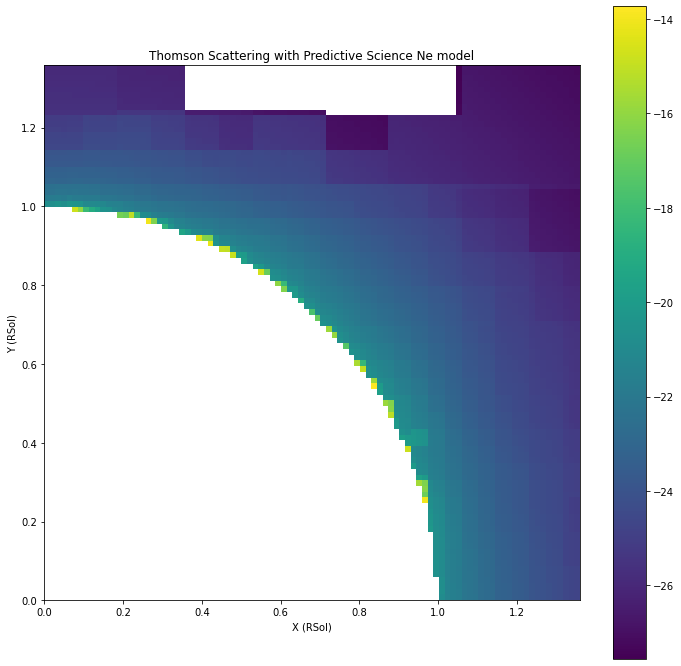

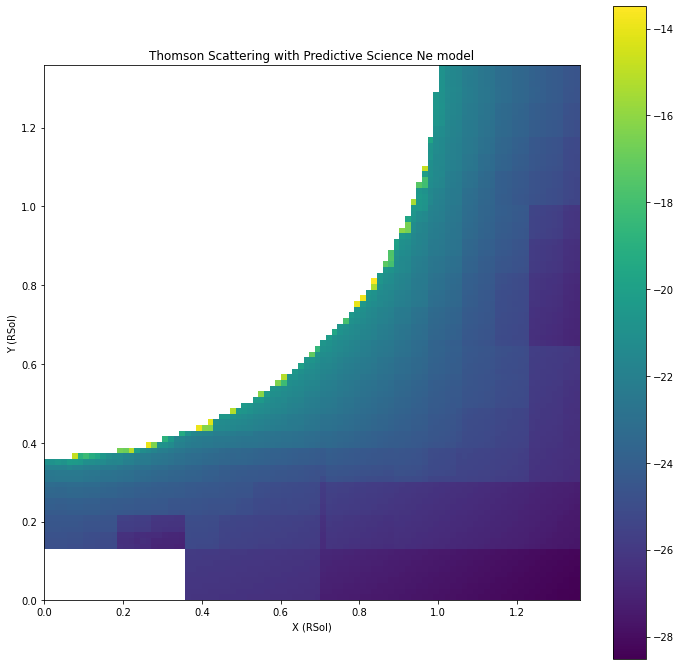

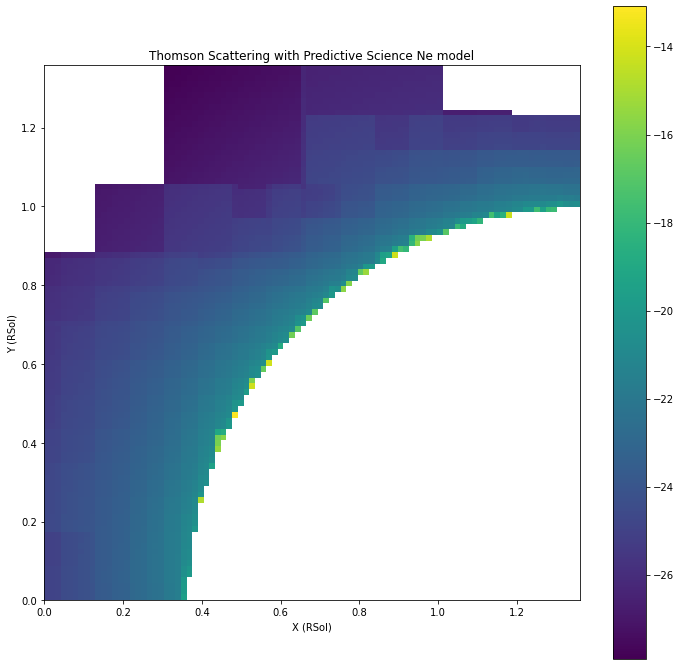

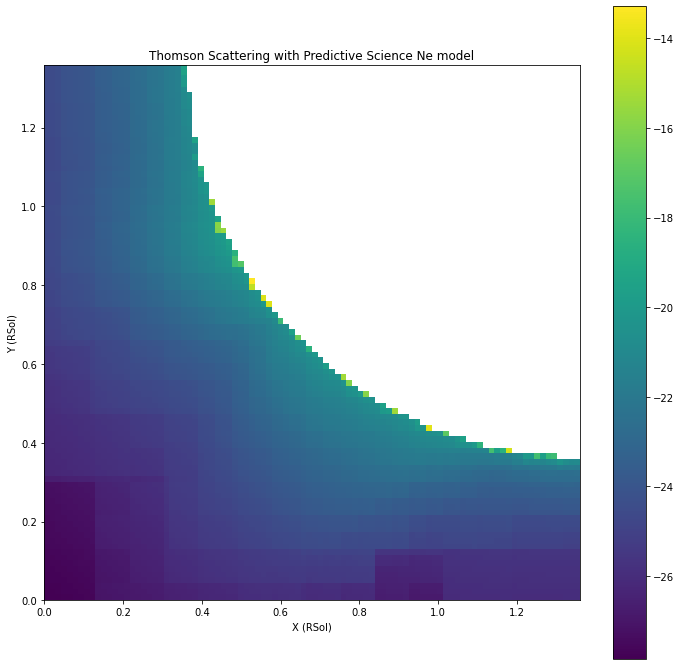

In [104]:
"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model[0:(sip.IMAGE_NUM_POINTS // 2), 0:(sip.IMAGE_NUM_POINTS // 2)]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), 0:(sip.IMAGE_NUM_POINTS // 2)]), extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()